In [61]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [62]:
# 한글 폰트 설정
font_path = "/System/Library/Fonts/Supplemental/AppleGothic.ttf"  # 예시 경로, 시스템에 맞게 조정
font_prop = fm.FontProperties(fname=font_path, size=14)

# matplotlib의 기본 폰트를 한글 폰트로 설정
plt.rcParams['font.family'] = font_prop.get_name()
plt.rcParams['axes.unicode_minus'] = False  # 음수 기호가 깨지는 문제 방지

In [63]:
current_ordinary_expenditures = {
    "laber": 8_000_000,
    "server": 1_000_000,
    "marketing": 500_000,
    "insurances": 803_440
}

pg_charge_percentage = 3.3

# 영업이익 계산
# (매출 - PG 수수료) * 매출 수수료율
def calc_operating_profit(sales: int, sales_commission_percentage: float) -> int:
    pg_charge = sales * pg_charge_percentage / 100
    return round((sales - pg_charge) * sales_commission_percentage / 100)

# 순이익 계산 (수수료 포함)
# 순이익 = 영업이익 - (인건비 + 서버비 + 마케팅비 + 보험료) - 법인세
def calc_sales_commission_with_expenditures(operating_profit: int) -> int:
    income = operating_profit - sum(current_ordinary_expenditures.values())
    if income < 0:
        return income
    else:
        return income - calc_comprehensive_income_tax(operating_profit)

# 종합소득세 계산
def calc_comprehensive_income_tax(operating_profit: int) -> int:
    if operating_profit < 0:
        return 0
    year_sales = operating_profit * 12
    if year_sales < 200_000_000:
        return operating_profit * 0.1
    elif year_sales < 2_000_000_000:
        return operating_profit * 0.2
    else:
        return operating_profit * 0.22

In [64]:
sales_matrix = [i for i in range(60_000_000, 200_000_000, 10_000_000)] 

sales_commission_percentage_matrix = [ i for i in range(4, 9, 2) ]

result = pd.DataFrame(columns=["매출", "영업 수수료(%)", "영업 이익", "순이익", "순이익율(%)"])

for sales in sales_matrix:
    for sales_commission_percentage in sales_commission_percentage_matrix:

        operating_profit = calc_operating_profit(sales, sales_commission_percentage)
        sales_commission = calc_sales_commission_with_expenditures(operating_profit)

        result = result.append({
            "매출": sales,
            "영업 수수료(%)": sales_commission_percentage,
            "영업 이익": operating_profit,
            "순이익": sales_commission,
            "순이익율(%)": round(sales_commission / sales * 100, 2),
        }, ignore_index=True)

/var/folders/71/7s66m40x4s50t14y3lt4mn3w0000gn/T/ipykernel_22012/1526799944.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({
/var/folders/71/7s66m40x4s50t14y3lt4mn3w0000gn/T/ipykernel_22012/1526799944.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({
/var/folders/71/7s66m40x4s50t14y3lt4mn3w0000gn/T/ipykernel_22012/1526799944.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({
/var/folders/71/7s66m40x4s50t14y3lt4mn3w0000gn/T/ipykernel_22012/1526799944.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({
/var/folders/71/7s66m40x4s50

In [65]:
sales = 0
step = 1_000_000

while True:
    sales += step
    operating_profit = calc_operating_profit(sales, 8.0)
    sales_commission = calc_sales_commission_with_expenditures(operating_profit)

    if sales_commission >= 0:
        print(f"손익분기점: {sales:,}")
        break


손익분기점: 148,000,000


In [66]:
# sort by 순이익율(%), 매출 column
result = result.sort_values(by=["영업 수수료(%)", "매출"])

In [67]:
# reduce number divide by 1,000
result["매출"] = result["매출"] / 1_000
result["영업 이익"] = result["영업 이익"] / 1_000
result["순이익"] = result["순이익"] / 1_000


In [68]:
# append comma to number
result["매출"] = result["매출"].apply(lambda x: f"{x:,}")
result["영업 이익"] = result["영업 이익"].apply(lambda x: f"{x:,}")
result["순이익"] = result["순이익"].apply(lambda x: f"{x:,}")

In [69]:
result.head(10)

,매출,영업 수수료(%),영업 이익,순이익,순이익율(%)
0,"60,000.0",4.0,"2,320.8","-7,982.64",-13.30
3,"70,000.0",4.0,"2,707.6","-7,595.84",-10.85
6,"80,000.0",4.0,"3,094.4","-7,209.04",-9.01
9,"90,000.0",4.0,"3,481.2","-6,822.24",-7.58
12,"100,000.0",4.0,"3,868.0","-6,435.44",-6.44
15,"110,000.0",4.0,"4,254.8","-6,048.64",-5.50
18,"120,000.0",4.0,"4,641.6","-5,661.84",-4.72
21,"130,000.0",4.0,"5,028.4","-5,275.04",-4.06
24,"140,000.0",4.0,"5,415.2","-4,888.24",-3.49
27,"150,000.0",4.0,"5,802.0","-4,501.44",-3.00


In [70]:
result.tail(10)

,매출,영업 수수료(%),영업 이익,순이익,순이익율(%)
14,"100,000.0",8.0,"7,736.0","-2,567.44",-2.57
17,"110,000.0",8.0,"8,509.6","-1,793.84",-1.63
20,"120,000.0",8.0,"9,283.2","-1,020.24",-0.85
23,"130,000.0",8.0,"10,056.8",-246.64,-0.19
26,"140,000.0",8.0,"10,830.4",-556.08,-0.40
29,"150,000.0",8.0,"11,604.0",140.16,0.09
32,"160,000.0",8.0,"12,377.6",836.4,0.52
35,"170,000.0",8.0,"13,151.2","1,532.64",0.90
38,"180,000.0",8.0,"13,924.8","2,228.88",1.24
41,"190,000.0",8.0,"14,698.4","2,925.12",1.54


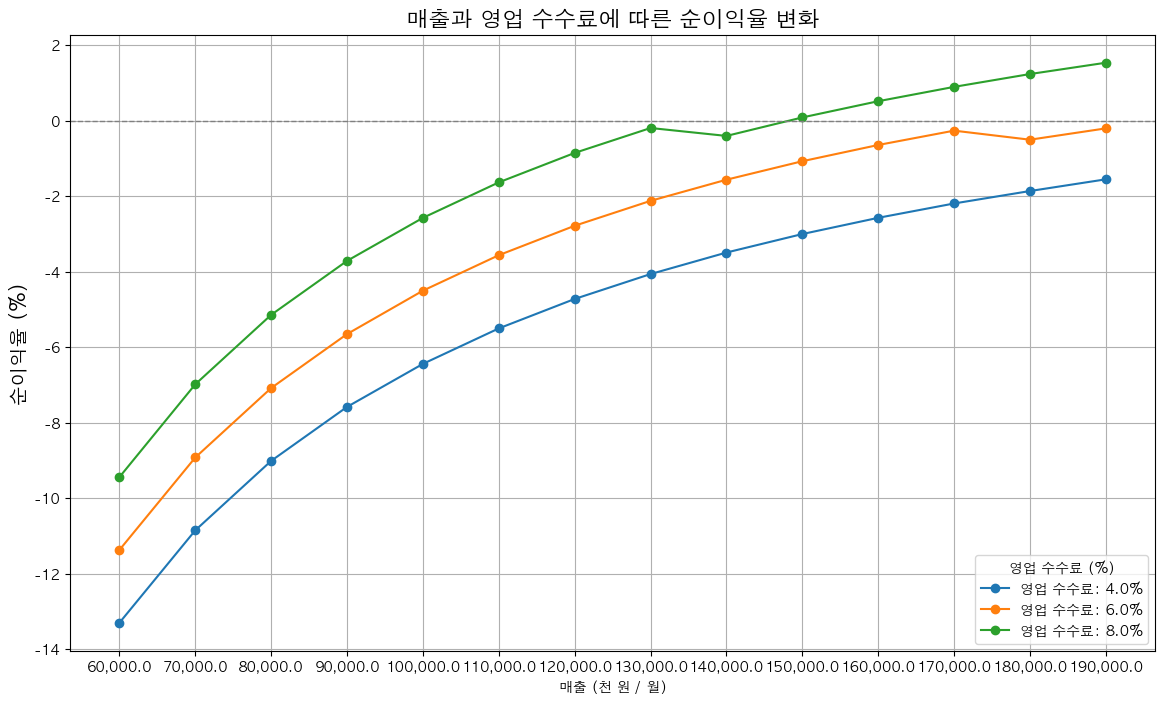

In [71]:
# Plotting
plt.figure(figsize=(14, 8))
for commission in result['영업 수수료(%)'].unique():
    subset = result[result['영업 수수료(%)'] == commission]
    plt.plot(subset['매출'], subset['순이익율(%)'], marker='o', label=f'영업 수수료: {commission}%')

plt.xlabel('매출 (천 원 / 월)', fontsize=10)
plt.ylabel('순이익율 (%)', fontsize=14)
plt.title('매출과 영업 수수료에 따른 순이익율 변화', fontsize=16)
plt.axhline(0, color='grey', lw=1, ls='--')  # Add a horizontal line at y=0
plt.legend(title='영업 수수료 (%)')
plt.grid(True)
plt.show()

In [72]:
result.to_csv("result.csv", index=False)